# 📚 3.3 相恋篇-图像数据处理

🔲能今天做好的事就不要等到明天。以梦为马，学习趁年华。

图像处理是指图像在神经网络训练之前的预处理，是人工智能视觉领域的重要组成部分。通过图像处理技术对图像数据集进行处理有两方面的作用：（1）将原始数据集处理成合格的、规范是数据集；（2）通过图像处理技术实现对原始数据集的增广。

## 一、本节目标
        本节将详述概述常用的图像处理技术如图像裁剪、尺寸调整、图像旋转、图像色彩变化等。

## 二、 图像数据处理
首先进行数据集挂载，步骤如下：
（1）点击左侧的【天池】按钮;    

<img src="https://img.alicdn.com/imgextra/i4/O1CN01zsetgx1zaOBQbSDLs_!!6000000006730-2-tps-616-589.png"/>   

(2) 搜索数据集“tensorflow_course_image_data”，然后点击下载按钮；

数据集下载成功后，⻚⾯右上⻆会提示数据集下载成功，也会说名数据集存储位置，默认在 <b>download</b>⽬录下，其名称为：tensorflow2_data.zip。
然后对数据集进行解压即可。  

In [4]:
!unzip -o tensorflow2_data.zip

Archive:  tensorflow2_data.zip
  inflating: tensorflow_image/219.jpg  
  inflating: tensorflow_image/3565.jpg  
  inflating: tensorflow_image/encode.jpg  


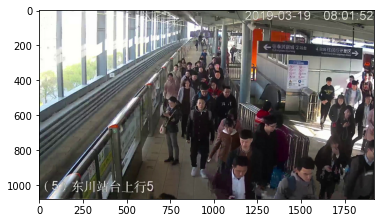

In [6]:
#库引入
import matplotlib.pyplot as plt
import tensorflow as tf
#图像读取
image_path="tensorflow_image/3565.jpg"
image=tf.io.read_file(image_path)
image_decode=tf.image.decode_image(image,channels=3)
#显示图像
plt.imshow(image_decode)
plt.show()

### 2.1 图像放缩
     图像放缩是指保持图像的内容不变，对图像的尺寸进行调整，将图像的长和宽按照对应的比例进行变化。Tensorflow中提供的图像放缩函数如下：

**tf.image.resize**(  
    images,  
    size,  
    method,  
    preserve_aspect_ratio,  
    antialias=False,  
    name=None  
)

参数介绍如下:

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161598438412846491615984383002.png"/>

before resize image hight:1080,width:1920,channels:3
after resize image hight:618,width:618,channels:3


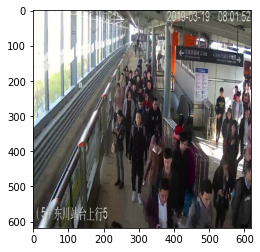

In [4]:
#获取图像尺寸信息
h,w,c=image_decode.shape
print("before resize image hight:{},width:{},channels:{}".format(h,w,c))
#图像放缩
image_resize=tf.image.resize(
    image_decode,
    (618,618),
    method="bilinear",
)
#获取图像尺寸信息
h,w,c=image_resize.shape
print("after resize image hight:{},width:{},channels:{}".format(h,w,c))
#显示图像
image_resize=image_resize/255
plt.imshow(image_resize)
plt.show()

### 2.2 图像翻转
图像旋转是指图像左右或上下对称翻转。tensorflow中针对上下和左右翻转提供了不同的方法。

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161598451774488521615984516512.png"/>

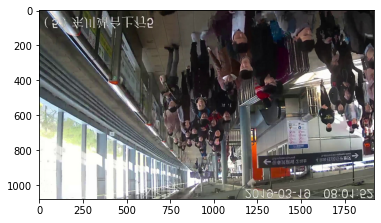

In [6]:
#上下翻转
image_flip=tf.image.flip_up_down(image_decode)
plt.imshow(image_flip)
plt.show()

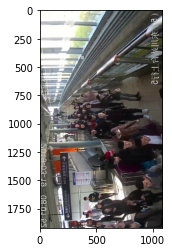

In [9]:
#对角线翻转
image_tans=tf.image.transpose(image_decode)
plt.imshow(image_tans)
plt.show()

### 2.3 图像旋转
tensorflow在图像旋转方面的函数还不够完善，目前，只提供了一个函数，但该函数不能实现图像旋转任意角度，只能旋转90、180、270、360度，是通过旋转次数来控制的，该函数如下：  
tf.image.rot90(image，k)  
参数：  
image:  图像tensor;  
k: 旋转次数，图像逆时针旋转（k*90)度  

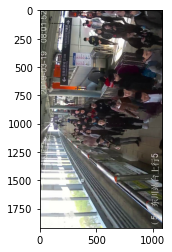

In [7]:
#图像旋转
image_rot=tf.image.rot90(image_decode,1)
plt.imshow(image_rot)
plt.show()

### 2.4 图像色彩调整
颜色是目标的重要特征，同一种颜色对亮度、对比度、饱和度等进行调整不但不会影响推理的结果，反而会增加模型的泛化能力。tensorflow提供了相关颜色调整的函数。

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161598456769579641615984566489.png"/>

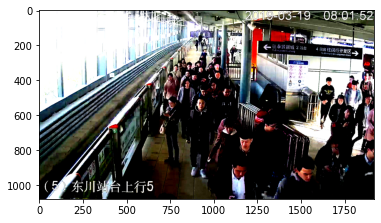

In [10]:
#对比度调整
image_contrast=tf.image.adjust_contrast(image_decode,3)
plt.imshow(image_contrast)
plt.show()

## 三、 图像处理建议
图像处理是提升数据集质量和增加样本多样性的基础，同时，图像处理的方法多种多样，tensorflow的image模块为大家提供了大量的图像处理函数，在此不一一列举如何使用，希望大家参照官网文档对相关函数进行学习。